# Game Sales Analysis

In this study, we will focus on identifying patterns that most influence a game's success. This will allow our client to bet on potentially popular products and better plan marketing campaigns.

To achieve this goal, we were provided with data from open sources up until 2016. These are historical data about game sales, user and expert ratings, genres, and platforms.

The data includes the following information:

- `Name` — game title
- `Platform` — platform
- `Year_of_Release` — release year
- `Genre` — game genre
- `NA_sales` — sales in North America (millions of copies sold)
- `EU_sales` — sales in Europe (millions of copies sold)
- `JP_sales` — sales in Japan (millions of copies sold)
- `Other_sales` — sales in other countries (millions of copies sold)
- `Critic_Score` — critic rating (maximum 100)
- `User_Score` — user rating (maximum 10)
- `Rating` — rating from the ESRB organization (Entertainment Software Rating Board). This association determines the rating of video games and assigns an appropriate age category.

The study will be conducted in several steps:

- In the first step, we will load the data and perform a basic data check.
- In the second step, we will conduct a more thorough data check, focusing on data types, missing values, and duplicates.
- In the third step, we will perform exploratory data analysis, look for unusual phenomena, artifacts, and errors in the data, and create visualizations.
- In the fourth step, we will try to build a user profile for each region.
- In the fifth step, we will consider and test several hypotheses for the business.
- Finally, we will make a general conclusion from the study.

However, before we begin, we will load the libraries we will use in the research.

In [87]:
import pandas as pd

In [88]:
import numpy as np

In [89]:
import matplotlib.pyplot as plt

In [90]:
import seaborn as sns

In [91]:
from scipy import stats as st

In [92]:
import random

#### Data Loading

Let us load the data from CSV files into a DataFrame using the pandas library. Then, we will examine the first few rows of each dataset and review the general information.

In [93]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [94]:
df.head(60)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


At first glance, several issues need to be addressed before proceeding with exploratory data analysis:

- Standardize column names to follow a consistent style.
- Change the data type of the release year column.
- Handle missing data in the last three columns by restoring or addressing it.

Let's take a closer look at the data using the .info() method.

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


The results from using the .info() method confirmed the initial observations. We need to address the following:

- Standardize the column names by unifying their style (e.g., convert all to lowercase).
- Convert data to the appropriate types in the Year_of_Release and User_Score columns.
- Fill in the missing values in the Year_of_Release, Critic_Score, User_Score, and Rating columns.
- Finally, check for both explicit and implicit duplicates.

#### Data Preprocessing

Let’s rename the column names by converting them to lowercase using a combination of the .columns and .str.lower() methods:

In [96]:
df.columns = df.columns.str.lower()

In [97]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Much better. Let’s move on to converting the data types in the year_of_release and user_score columns.

- The year_of_release column represents a year (a time-related value). Such data should be stored as datetime64 instead of float64. We'll use the to_datetime() method.
- The user_score column represents a numerical rating. Its data type should be similar to critic_score, so it should be float64 instead of object. We'll use the to_numeric() method.

In [98]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y').dt.year

In [99]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

The data types now align with the content of their respective columns. We can proceed to address the missing values in the year_of_release, critic_score, user_score, and rating columns. We will handle these missing values individually for each column and explain the rationale behind either filling them in a specific way or leaving them unfilled.

First, we will calculate the total sales across all regions and store this value in a separate column. This will be useful for handling missing values. Let's proceed with creating the new column:

In [100]:
df['world_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [101]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [102]:
df['world_sales'].describe()

count    16715.000000
mean         0.533396
std          1.548261
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: world_sales, dtype: float64

In [103]:
df['year_of_release'].isna().sum() 

np.int64(269)

In [104]:
display(df[df['year_of_release'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+,0.01
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0.01
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0.01
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Missing year values could be filled by searching for values online, but this would take a long time for 269 rows. Sports games have a unique feature— the year in the game’s title is typically the year the game is released, but the release usually happens a year earlier. Let's filter out all games where there is a missing year and the genre is sports.

In [105]:
df_sport = df[((df['year_of_release'].isna()) & (df['genre'] == 'Sports'))]

In [106]:
df_sport

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
1301,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN,1.46
2479,Madden NFL 07,PSP,NaN,Sports,0.77,0.03,0.00,0.04,78.0,6.6,E,0.84
2492,MLB SlugFest 20-03,PS2,NaN,Sports,0.41,0.32,0.00,0.11,77.0,8.2,E,0.84
2536,Shaun White Snowboarding,X360,NaN,Sports,0.48,0.25,0.00,0.08,60.0,7.6,T,0.81
2572,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN,0.80
2849,Madden NFL 11,Wii,NaN,Sports,0.68,0.00,0.00,0.04,75.0,5.4,E,0.72
3413,Madden NFL 06,X360,NaN,Sports,0.54,0.00,0.01,0.03,74.0,4.9,E,0.58
3486,Madden NFL 2002,XB,NaN,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E,0.58


In [107]:
df.loc[df['name'] == 'Madden NFL 2004', 'year_of_release'] = "2003" 
df.loc[df['name'] == 'FIFA Soccer 2004', 'year_of_release'] = "2003" 
df.loc[df['name'] == 'Triple Play 99', 'year_of_release'] = "1998" 
df.loc[df['name'] == 'Madden NFL 07', 'year_of_release'] = "2006" 
df.loc[df['name'] == 'MLB SlugFest 20-03', 'year_of_release'] = "2002" 
df.loc[df['name'] == 'Shaun White Snowboarding', 'year_of_release'] = "2008" 
df.loc[df['name'] == 'PES 2009: Pro Evolution Soccer', 'year_of_release'] = "2008" 
df.loc[df['name'] == 'Madden NFL 11', 'year_of_release'] = "2010" 
df.loc[df['name'] == 'Madden NFL 06', 'year_of_release'] = "2005" 
df.loc[df['name'] == 'Madden NFL 2002', 'year_of_release'] = "2001" 
df.loc[df['name'] == 'NBA Street Vol. 2', 'year_of_release'] = "2003" 
df.loc[df['name'] == 'Fishing Derby', 'year_of_release'] = "1980" 
df.loc[df['name'] == 'Tiger Woods PGA Tour 07', 'year_of_release'] = "2006" 
df.loc[df['name'] == 'NHL Slapshot', 'year_of_release'] = "2010" 
df.loc[df['name'] == 'NFL GameDay 2003', 'year_of_release'] = "2002" 
df.loc[df['name'] == 'NBA Live 2003', 'year_of_release'] = "2002" 
df.loc[df['name'] == 'All-Star Baseball 2005', 'year_of_release'] = "2004" 
df.loc[df['name'] == 'NBA Live 2003', 'year_of_release'] = "2002" 
df.loc[df['name'] == 'College Hoops 2K6', 'year_of_release'] = "2005" 
df.loc[df['name'] == 'Jonah Lomu Rugby Challenge', 'year_of_release'] = "2011" 
df.loc[df['name'] == "Tony Hawk's Downhill Jam", 'year_of_release'] = "2003" 
df.loc[df['name'] == 'Big Beach Sports 2', 'year_of_release'] = "2010" 
df.loc[df['name'] == 'Move Fitness', 'year_of_release'] = "2011"
df.loc[df['name'] == 'Famista 64', 'year_of_release'] = "1997" 
df.loc[df['name'] == 'Backbreaker', 'year_of_release'] = "2009" 
df.loc[df['name'] == 'Home Run', 'year_of_release'] = "1978" 
df.loc[df['name'] == 'All-Star Baseball 2005', 'year_of_release'] = "2004" 
df.loc[df['name'] == 'Transworld Surf', 'year_of_release'] = "2001" 
df.loc[df['name'] == 'Street Hoops', 'year_of_release'] = "2002" 
df.loc[df['name'] == 'Major League Baseball 2K6', 'year_of_release'] = "2005" 
df.loc[df['name'] == 'Atsumare! Power Pro Kun no DS Koushien', 'year_of_release'] = "2006" 
df.loc[df['name'] == 'Get Fit with Mel B', 'year_of_release'] = "2010" 
df.loc[df['name'] == 'Mountain Bike Adrenaline', 'year_of_release'] = "2007" 
df.loc[df['name'] == 'NHL Hitz Pro', 'year_of_release'] = "2003" 
df.loc[df['name'] == 'Major League Baseball 2K8', 'year_of_release'] = "2007" 
df.loc[df['name'] == 'Mario Tennis', 'year_of_release'] = "2000" 
df.loc[df['name'] == "Cabela's Alaskan Adventure", 'year_of_release'] = "2006" 
df.loc[df['name'] == 'PDC World Championship Darts 2008', 'year_of_release'] = "2007" 
df.loc[df['name'] == 'Football Manager 2007', 'year_of_release'] = "2006" 
df.loc[df['name'] == 'PDC World Championship Darts 2008', 'year_of_release'] = "2007" 

C:\Users\Артемий Иванилов\AppData\Local\Temp\ipykernel_22904\1533889854.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2003' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['name'] == 'Madden NFL 2004', 'year_of_release'] = "2003"


In [108]:
display(df[df['year_of_release'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,2.47
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E,2.40
...,...,...,...,...,...,...,...,...,...,...,...,...
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0.01
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0.01
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


The remaining missing values in the year_of_release column will simply be removed.

In [109]:
df = df.dropna(subset=['year_of_release']) 

Let's check the number of missing values and the number of rows.

In [110]:
df['year_of_release'].isna().sum() 

np.int64(0)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16487 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16485 non-null  object 
 1   platform         16487 non-null  object 
 2   year_of_release  16487 non-null  object 
 3   genre            16485 non-null  object 
 4   na_sales         16487 non-null  float64
 5   eu_sales         16487 non-null  float64
 6   jp_sales         16487 non-null  float64
 7   other_sales      16487 non-null  float64
 8   critic_score     8011 non-null   float64
 9   user_score       7484 non-null   float64
 10  rating           9798 non-null   object 
 11  world_sales      16487 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.6+ MB


Let's move on to the next column — rating. It makes more sense to fill in the missing values for games depending on their genre. For shooters, a stricter rating is likely to be assigned than for simulators. But first, let's check how many missing values we have before processing.

In [112]:
df['rating'].isna().sum() 

np.int64(6689)

In [113]:
df['rating'].isna().sum() 

np.int64(6689)

In [114]:
display(df[df['rating'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


There are still rows where the genre is missing, so the function couldn't assign rating values. We will delete these rows, as even the game title is missing, making it unlikely that we can recover this data.

In [115]:
df = df.dropna(subset=['name']) 

In [116]:
df['rating'].isna().sum() 

np.int64(6687)

Great, we've handled the missing values in the rating column—now we can move on. Next in line are the critic_score and user_score columns. It's also worth mentioning the abbreviation that appeared in the user_score column but was lost after applying the to_numeric() function. This abbreviation is 'tbd,' which stands for "to be determined." It may indicate that the score will be determined later, possibly when a critical number of ratings is gathered. Let's take a look at the number of missing values.

In [117]:
df['critic_score'].isna().sum() 

np.int64(8474)

In [118]:
df['critic_score'] = df['critic_score'].fillna(0)

In [119]:
df['user_score'].isna().sum() 

np.int64(9001)

In [120]:
df['user_score'] = df['user_score'].fillna(0)

Unfortunately, there are no logical ways to fill in the data, so we'll leave these missing values as they are (replacing them with zero).

Possible reasons for missing data can be divided into two main groups: absence of data itself or issues during data processing and provision. For the first case, critic scores or ratings are more relevant. For example, the game was unpopular, so there were not enough ratings to generate an overall score. In the second case, issues during data processing or format conversion could have led to missing values in the columns. This is more applicable to the release year of a game, as every game was created and released at some point, regardless of its popularity.

Let's look for duplicates in the quality characteristics of the data, such as the "platform" and "genre" columns.

In [121]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [122]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [123]:
df.duplicated().sum()

np.int64(0)

There are no duplicates. Missing values have been restored. Data types have been set correctly. We can now conclude the data preprocessing.

#### Exploratory Data Analysis

Let's move on to exploratory data analysis. We'll examine how many games were released in different years and answer the question of whether data from all periods is important.

In [124]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [125]:
sorted_data = df.sort_values(by='year_of_release')

In [126]:
year_counts = sorted_data.groupby('year_of_release').size()

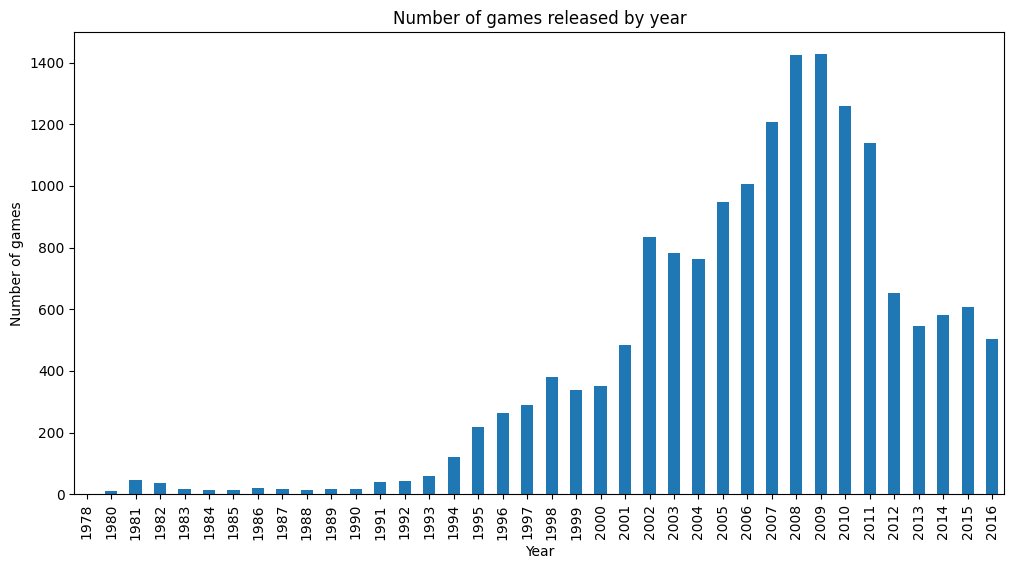

In [127]:
year_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of games released by year')
plt.xlabel('Year')
plt.ylabel('Number of games')
plt.show()

On the graph, we can observe that the majority of the games in the dataframe were released between 2005 and 2010 (about 4500 games). Meanwhile, the number of games released between 1980 and 1995 was quite low. These data are not very useful for the analysis.

Now, let's take a look at how sales have changed across platforms. We'll find the platforms with the highest total sales and plot their distribution over the years. We'll answer the question: what is the typical lifespan of platforms, and how long does it take for new ones to appear and old ones to disappear?

In [128]:
# Selecting platforms with the highest total sales
top_platforms = df.groupby('platform')['world_sales'].sum().sort_values(ascending=False)
top_platforms

platform
PS2     1244.19
X360     962.89
PS3      931.97
Wii      893.23
DS       802.89
PS       729.04
PS4      314.14
GBA      312.88
PSP      291.33
3DS      257.83
PC       255.76
GB       254.43
XB       252.79
NES      251.05
N64      218.21
SNES     200.04
GC       197.71
XOne     159.32
2600      87.15
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: world_sales, dtype: float64

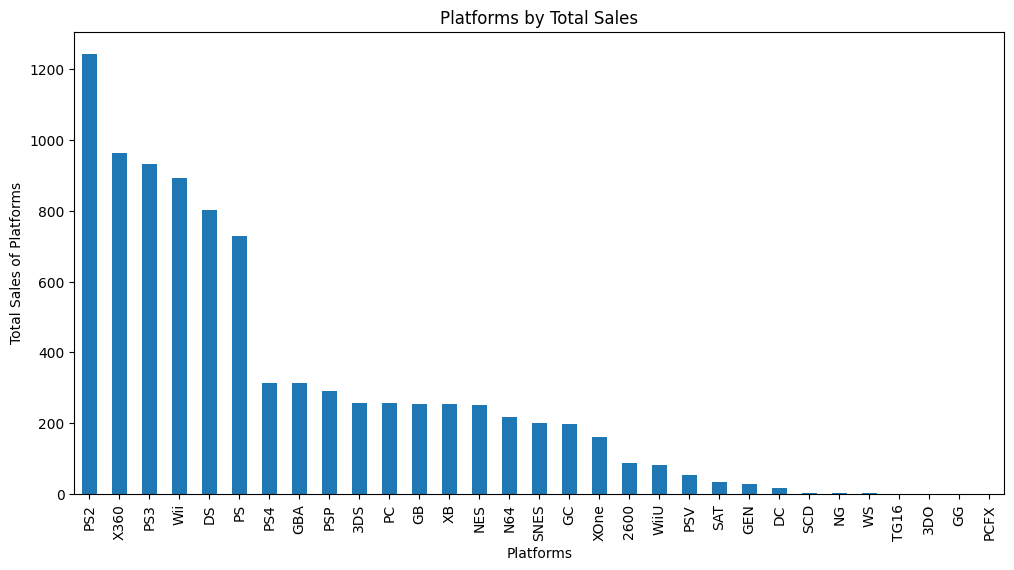

In [129]:
top_platforms.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Platforms by Total Sales')
plt.xlabel('Platforms')
plt.ylabel('Total Sales of Platforms')
plt.show()

In [130]:
# Filter the original dataframe for top platforms
filtered_data = df.query('platform in @top_platforms.index')
filtered_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,NaN,0.01


In [131]:
# Group the data by platform and release year, and sum the world sales
aggregated_data = filtered_data.groupby(['platform', 'year_of_release'])['world_sales'].sum().reset_index()
aggregated_data

,platform,year_of_release,world_sales
0,2600,1978,0.15
1,2600,1980,11.90
2,2600,1981,35.68
3,2600,1982,28.88
4,2600,1983,5.84
...,...,...,...
238,XB,2008,0.18
239,XOne,2013,18.96
240,XOne,2014,54.07
241,XOne,2015,60.14


In [132]:
# Keep only the top platforms
aggregated_data_5 = aggregated_data.query('platform == "PS2" or platform == "X360" or platform == "PS3" or platform == "Wii" or platform == "DS" or platform == "PS"') 
aggregated_data_5

,platform,year_of_release,world_sales
27,DS,1985,0.02
28,DS,2003,0.22
29,DS,2004,17.27
30,DS,2005,130.14
31,DS,2006,119.69
...,...,...,...
225,X360,2012,99.74
226,X360,2013,88.58
227,X360,2014,34.74
228,X360,2015,11.96


In [133]:
aggregated_data_5 = aggregated_data_5[(aggregated_data_5['year_of_release'] > 1994)]

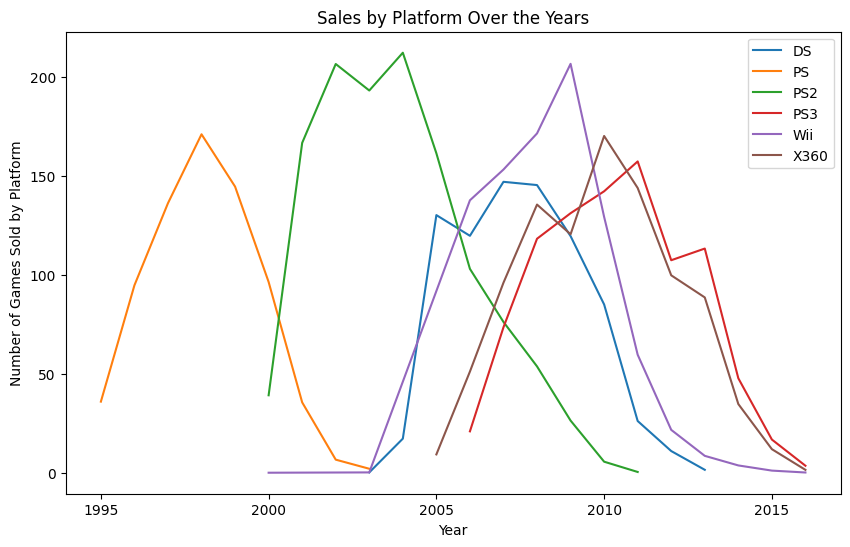

In [134]:
plt.figure(figsize=(10, 6))
for platform in aggregated_data_5['platform'].unique(): # Build a plot for each platform
    platform_data = aggregated_data_5[aggregated_data_5['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['world_sales'], label=platform)
plt.legend()
plt.title('Sales by Platform Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Games Sold by Platform') 
plt.show()

The top 6 platforms by sales:

- PS2 1255.77 - sales years from 2000 to 2010
- X360 971.42 - sales years from 2005 to 2015
- PS3 939.65 - sales years from 2006 to 2016
- Wii 907.51 - sales years from 2003 to 2013
- DS 806.12 - sales years from 2003 to 2013
- PS 729.04 - sales years from 1994 to 2004

It can be said that the typical lifespan of a platform is about 10 years.

Let's create a box plot for global game sales, broken down by platform, and describe the result. We'll filter the dataframe from 2012 to 2016 to ensure that the forecast for 2017 is relevant.

In [135]:
df_2016 = df[df['year_of_release'] >= 2012]
df_2016

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.0,0.0,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,NaN,0.01


In [136]:
df_2016['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

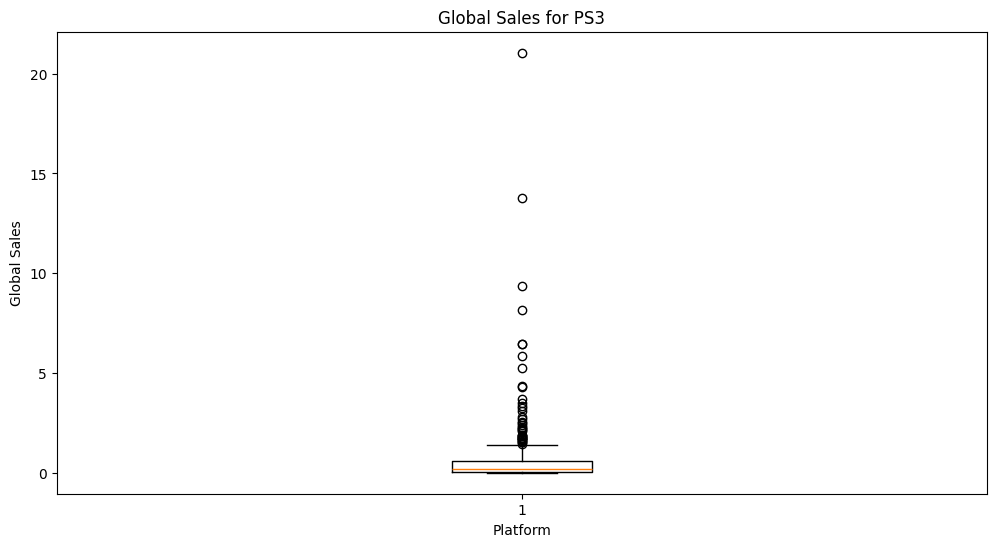

In [137]:
plt.figure(figsize=(12, 6))
plt.boxplot(df_2016[df_2016['platform'] == 'PS3']['world_sales'])
plt.title('Global Sales for PS3')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.show()

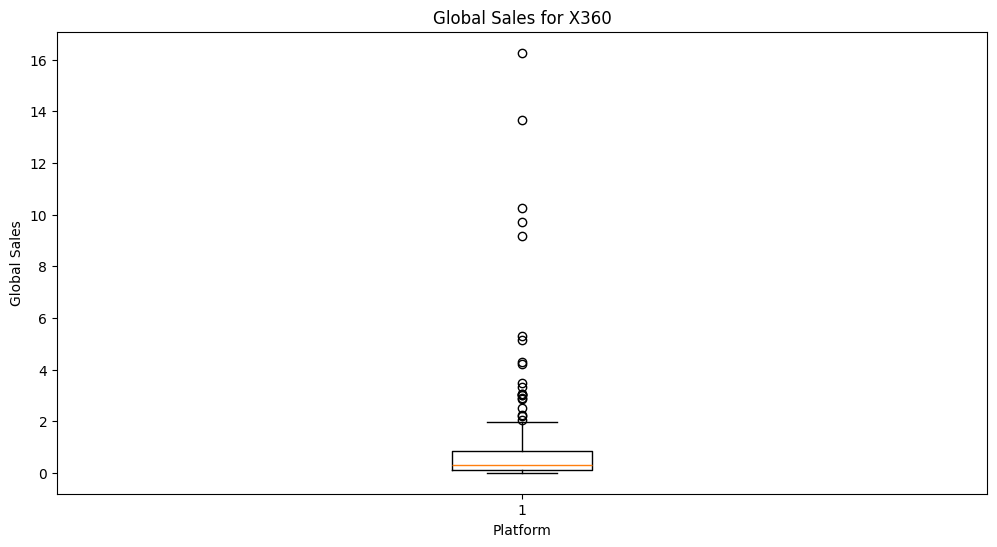

In [138]:
plt.figure(figsize=(12, 6))
plt.boxplot(df_2016[df_2016['platform'] == 'X360']['world_sales'])
plt.title('Global Sales for X360')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.show()

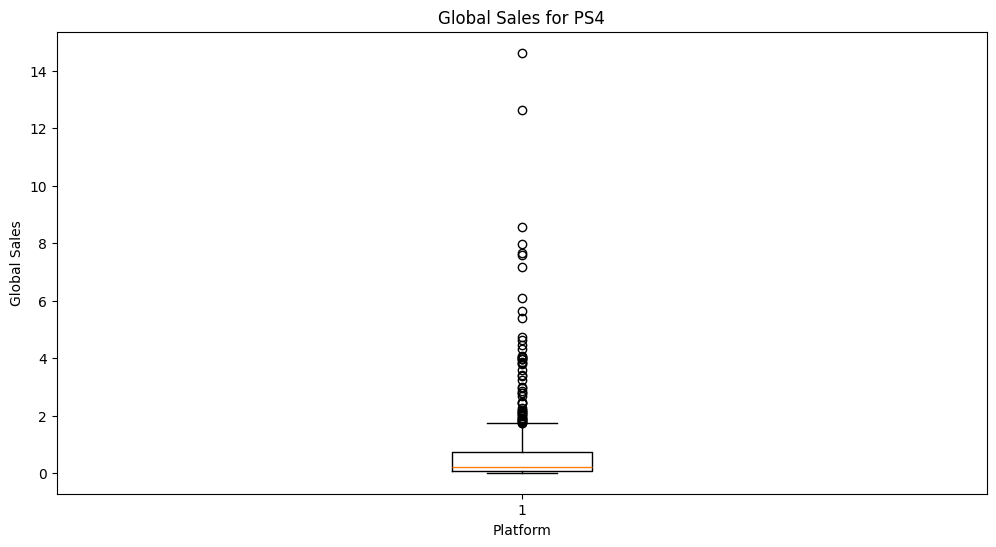

In [139]:
plt.figure(figsize=(12, 6))
plt.boxplot(df_2016[df_2016['platform'] == 'PS4']['world_sales'])
plt.title('Global Sales for PS4')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.show()

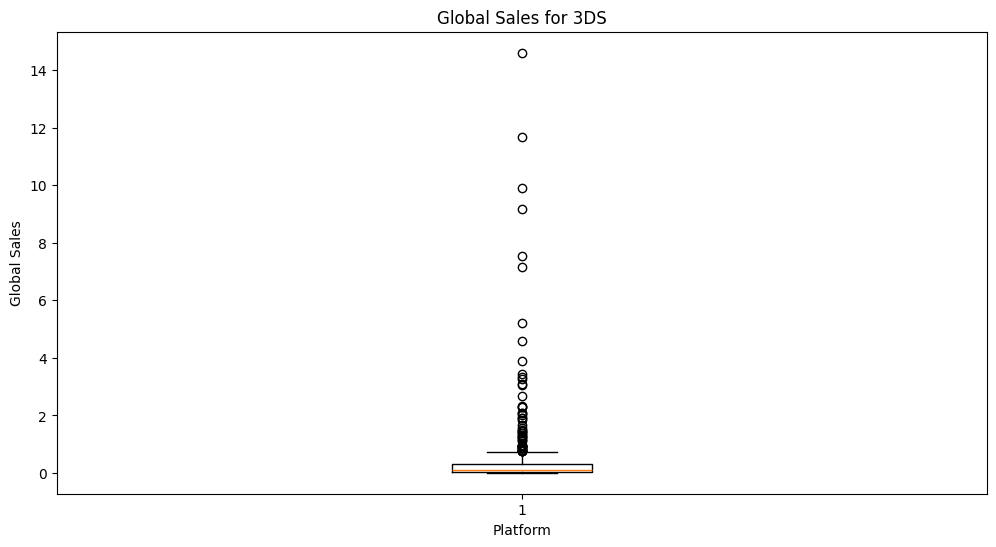

In [140]:
plt.figure(figsize=(12, 6))
plt.boxplot(df_2016[df_2016['platform'] == '3DS']['world_sales'])
plt.title('Global Sales for 3DS')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.show()

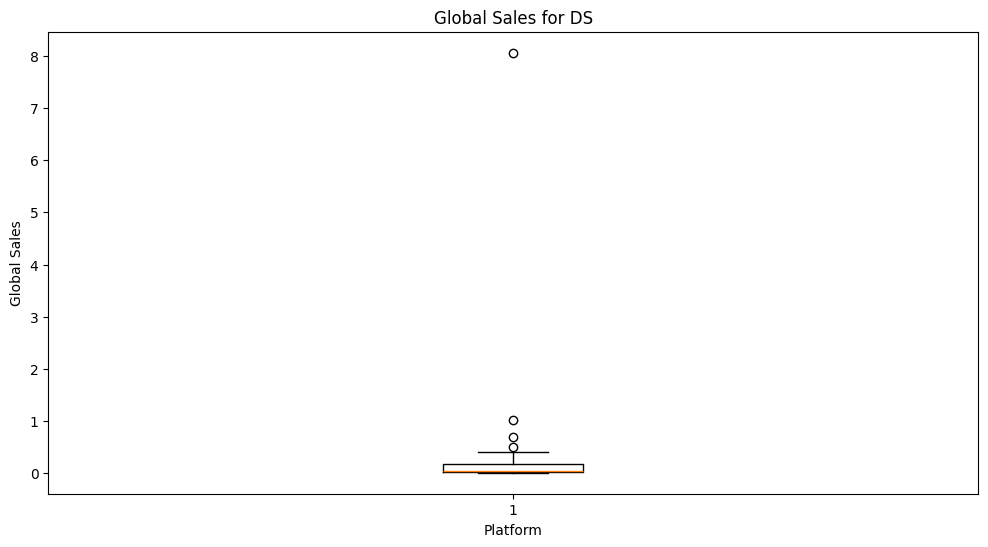

In [141]:
plt.figure(figsize=(12, 6))
plt.boxplot(df_2016[df_2016['platform'] == 'DS']['world_sales'])
plt.title('Global Sales for DS')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.show()

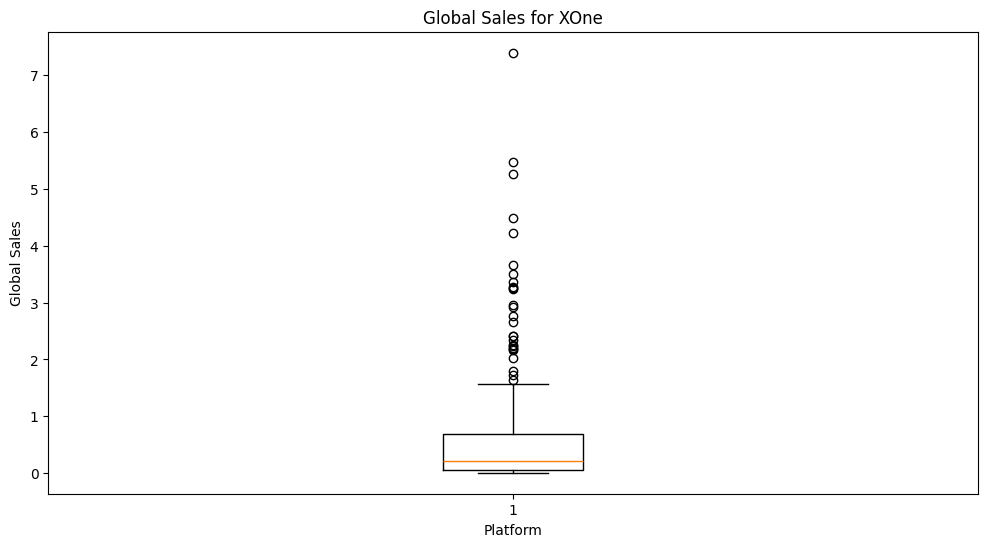

In [142]:
plt.figure(figsize=(12, 6))
plt.boxplot(df_2016[df_2016['platform'] == 'XOne']['world_sales'])
plt.title('Global Sales for XOne')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.show()

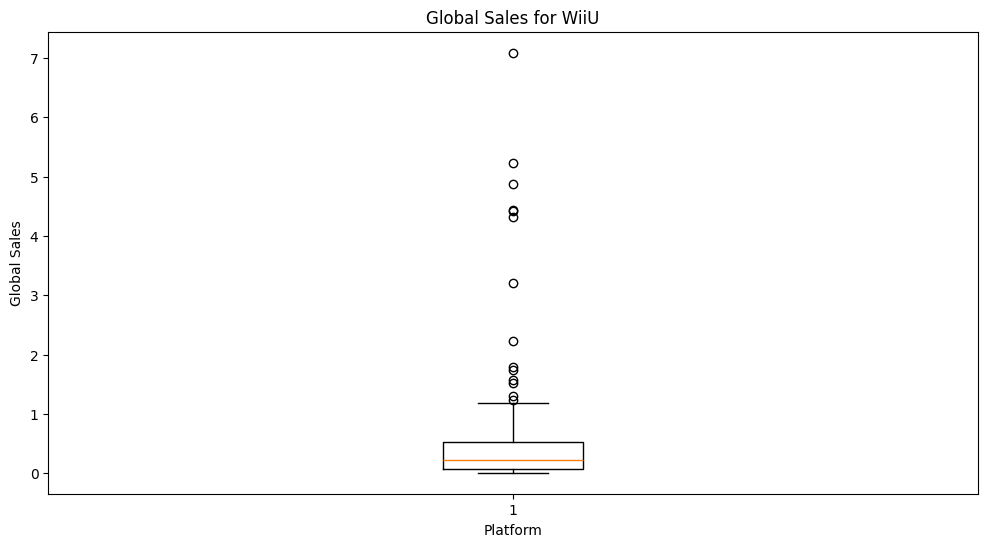

In [143]:
plt.figure(figsize=(12, 6))
plt.boxplot(df_2016[df_2016['platform'] == 'WiiU']['world_sales'])
plt.title('Global Sales for WiiU')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.show()

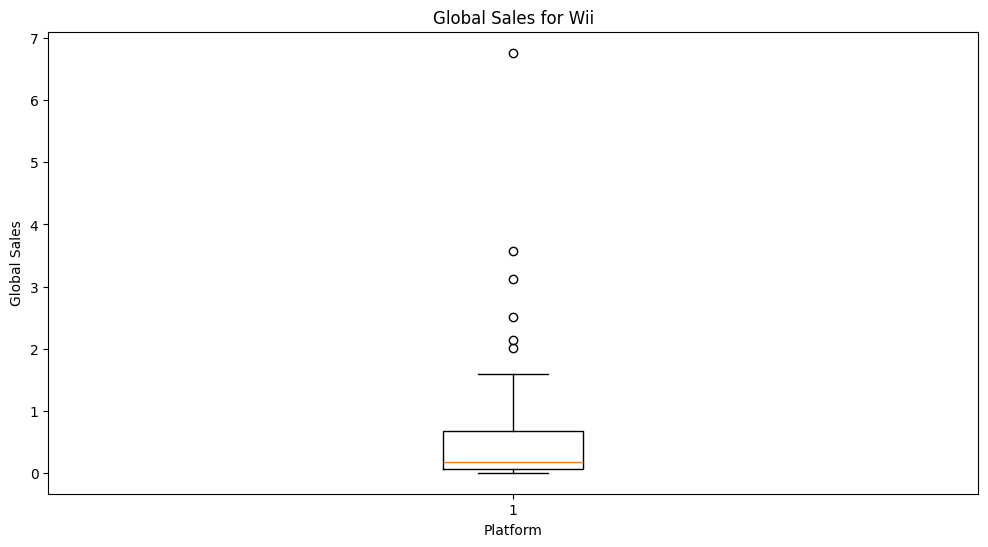

In [144]:
plt.figure(figsize=(12, 6))
plt.boxplot(df_2016[df_2016['platform'] == 'Wii']['world_sales'])
plt.title('Global Sales for Wii')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.show()

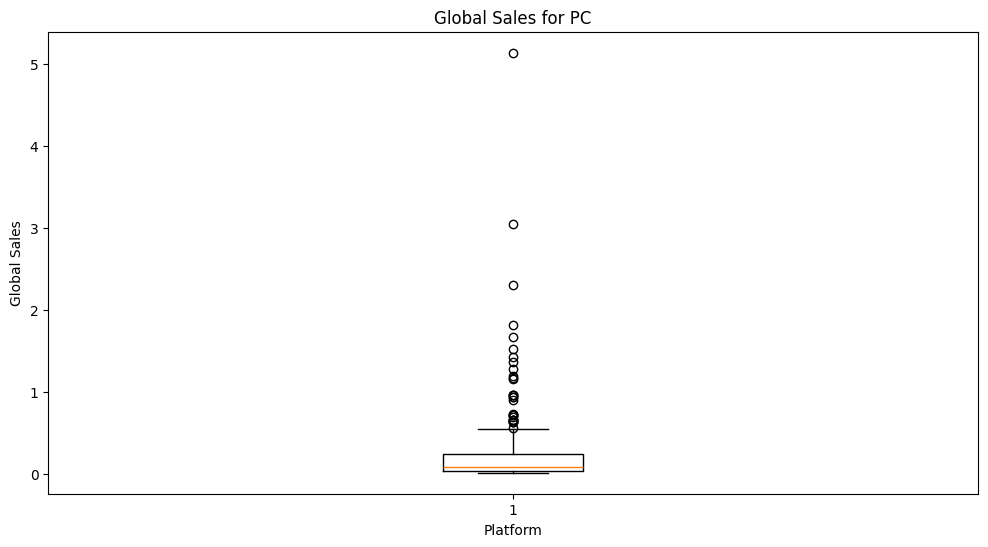

In [145]:
plt.figure(figsize=(12, 6))
plt.boxplot(df_2016[df_2016['platform'] == 'PC']['world_sales'])
plt.title('Global Sales for PC')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.show()

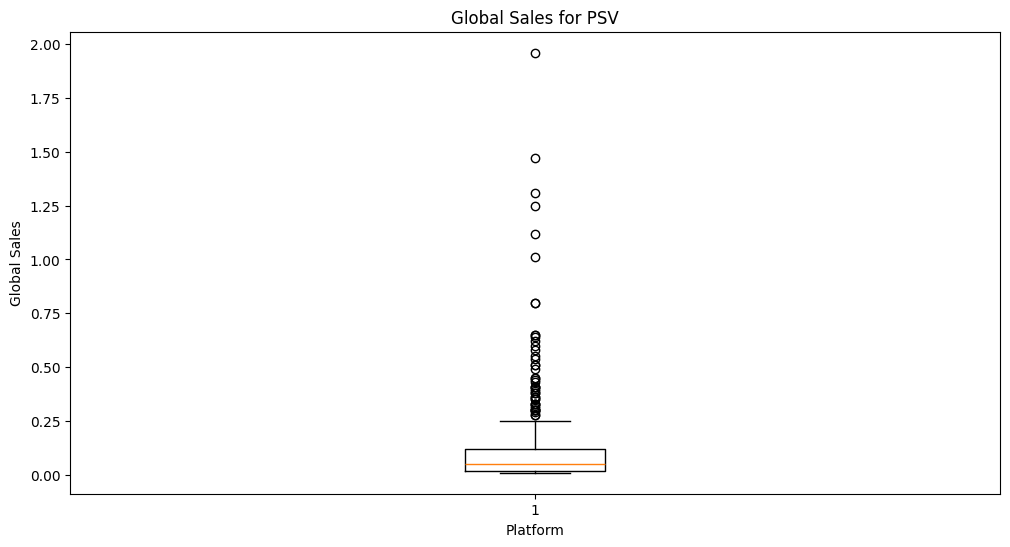

In [146]:
plt.figure(figsize=(12, 6))
plt.boxplot(df_2016[df_2016['platform'] == 'PSV']['world_sales'])
plt.title('Global Sales for PSV')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.show()

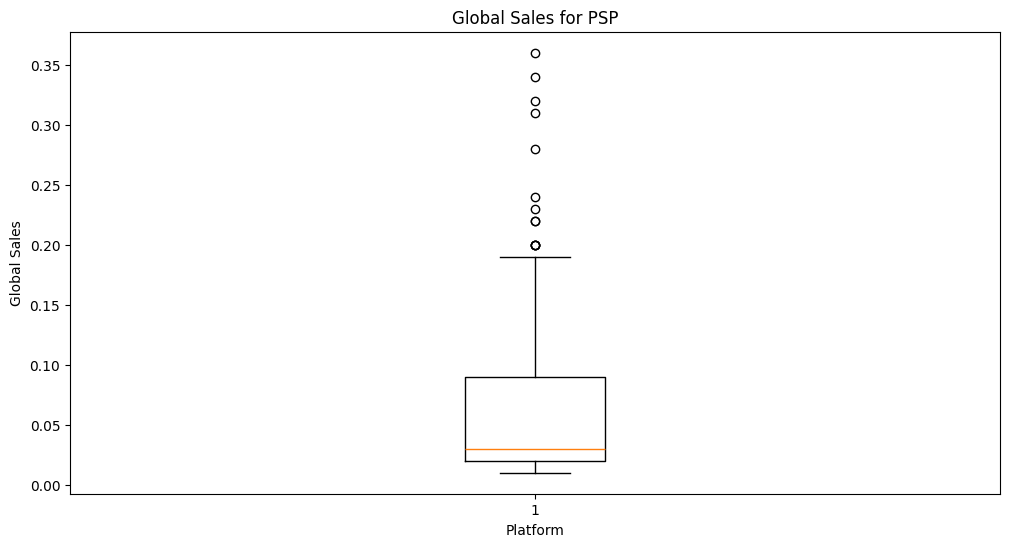

In [147]:
plt.figure(figsize=(12, 6))
plt.boxplot(df_2016[df_2016['platform'] == 'PSP']['world_sales'])
plt.title('Global Sales for PSP')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.show()

Potentially profitable platforms for 2017 can be considered PS4, XOne, and 3DS.

Next, let's focus on how user and critic reviews influence sales within a popular platform. We will create a scatter plot and calculate the correlation between reviews and sales for potentially profitable platforms.

In [148]:
# From the original dataframe, we will select the data for the best-selling platform, PlayStation 2 (PS2), and remove rows with zero critic scores.
ps4_data = df_2016[(df_2016['platform'] == 'PS4')&(df_2016['critic_score'] != 0)&(df_2016['user_score'] != 0)]

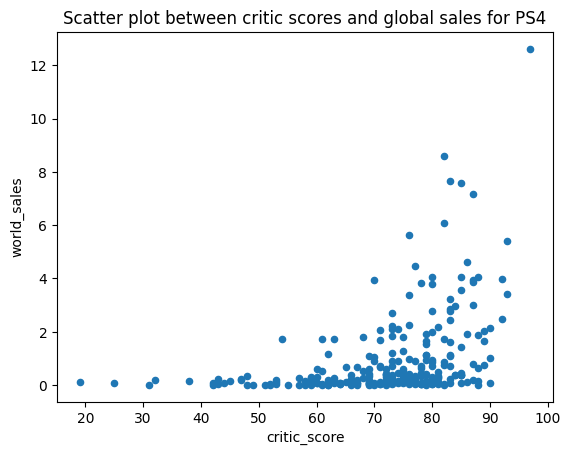

In [149]:
# we will create a scatter plot to visualize the relationship between critic scores and global sales.
ps4_data.plot(x='critic_score', y='world_sales', kind='scatter')
plt.title('Scatter plot between critic scores and global sales for PS4')
plt.show()

In [150]:
# Calculate the correlation between critic scores and sales
correlation_critic = ps4_data['critic_score'].corr(ps4_data['world_sales'])
correlation_critic

np.float64(0.40589480145836687)

The correlation value of 0.41 indicates a moderate positive relationship between sales and critic ratings. This means that an increase in sales moderately influences a positive critic rating, and conversely, a positive critic rating is also moderately associated with higher sales.

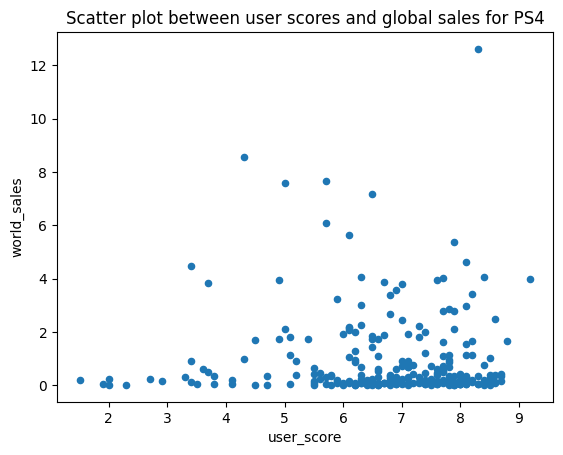

In [151]:
# Build a scatter plot for user scores
ps4_data.plot(x='user_score', y='world_sales', kind='scatter')
plt.title('Scatter plot between user scores and global sales for PS4')
plt.show()

In [152]:
# Calculate the correlation between user scores and sales
correlation_user = ps4_data['user_score'].corr(ps4_data['world_sales'])
correlation_user

np.float64(-0.03362497596528878)

The correlation value of -0.032 indicates a weak negative relationship between the two variables. This means that as one variable, such as sales, increases, user scores tend to decrease, but this relationship is not strong.

Let's take a look at other popular platforms - XOne, 3DS.

In [153]:
XOne_data = df_2016[(df_2016['platform'] == 'XOne')&(df_2016['critic_score'] != 0)&(df_2016['user_score'] != 0)]

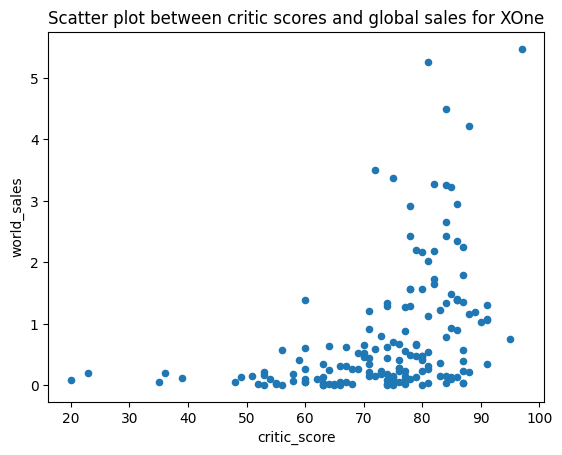

In [154]:
# plot a scatter plot for critic scores
XOne_data.plot(x='critic_score', y='world_sales', kind='scatter')
plt.title('Scatter plot between critic scores and global sales for XOne')
plt.show()

In [155]:
correlation_critic = XOne_data['critic_score'].corr(XOne_data['world_sales'])
correlation_critic

np.float64(0.41042203561296375)

Just like for PS4, we observe a moderate positive correlation for critic scores. This means that an increase in sales moderately influences a positive critic score, and conversely, a positive critic score is also moderately associated with an increase in sales.

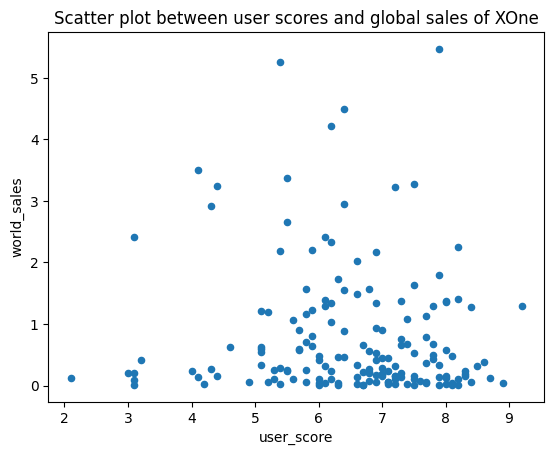

In [156]:
# Create a scatter plot for user scores
XOne_data.plot(x='user_score', y='world_sales', kind='scatter')
plt.title('Scatter plot between user scores and global sales of XOne')
plt.show()

In [157]:
correlation_user = XOne_data['user_score'].corr(XOne_data['world_sales'])
correlation_user

np.float64(-0.09400318326920852)

Just like for PS4, we observe a weak negative correlation for user scores. This means that as one variable, such as sales, increases, user ratings tend to decrease, but this relationship is not strong.

In [158]:
THREEDS_data = df_2016[(df_2016['platform'] == '3DS')&(df_2016['critic_score'] != 0)&(df_2016['user_score'] != 0)]

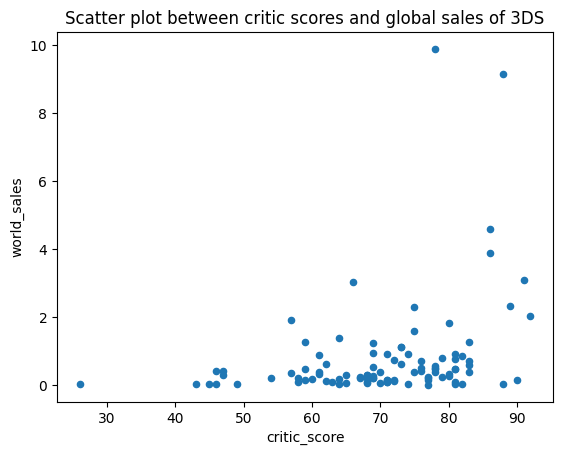

In [159]:
# Build scatter plot for critic scores
THREEDS_data.plot(x='critic_score', y='world_sales', kind='scatter')
plt.title('Scatter plot between critic scores and global sales of 3DS')
plt.show()

In [160]:
correlation_critic = THREEDS_data['critic_score'].corr(THREEDS_data['world_sales'])
correlation_critic

np.float64(0.31055301915326294)

Unlike other platforms, the correlation between critic scores and sales for 3DS is even weaker, but it still remains within the range of a moderate positive relationship.

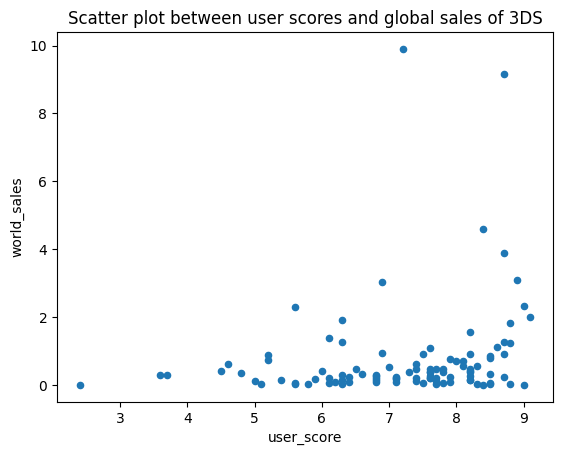

In [161]:
# Create a scatter plot for user scores
THREEDS_data.plot(x='user_score', y='world_sales', kind='scatter')
plt.title('Scatter plot between user scores and global sales of 3DS')
plt.show()

In [162]:
correlation_user = THREEDS_data['user_score'].corr(THREEDS_data['world_sales'])
correlation_user

np.float64(0.20181255007655283)

Unlike other platforms, the correlation between user scores and sales for 3DS is positive, but weak.

Let's also take a look at the overall distribution of games by genre – which genres are characterized by high and low sales? What characteristics can we assign to the most popular and least popular genres?

In [163]:
# Group data by genre and sum sales for each genre
genre_sales = df_2016.groupby('genre')['world_sales'].mean().sort_values()
genre_sales

genre
Adventure       0.097450
Puzzle          0.174643
Strategy        0.187887
Fighting        0.408165
Action          0.427856
Simulation      0.439000
Misc            0.442917
Racing          0.465217
Role-Playing    0.521081
Sports          0.675634
Platform        0.717647
Shooter         1.296723
Name: world_sales, dtype: float64

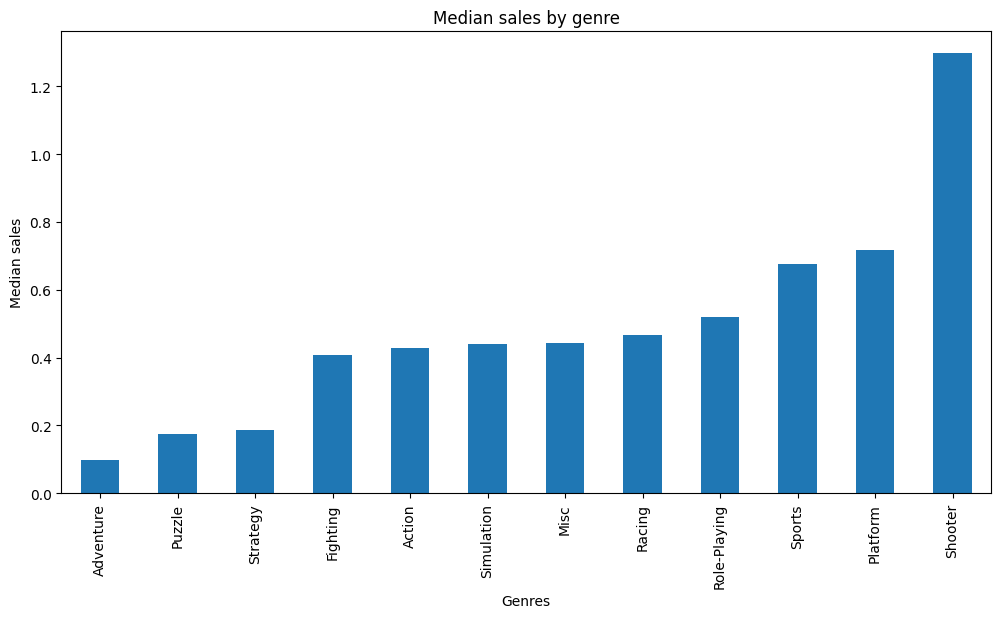

In [164]:
genre_sales.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Median sales by genre')
plt.xlabel('Genres')
plt.ylabel('Median sales') 
plt.show()

Based on the provided data, we can conclude that the most profitable genres in 2017 are:

- Shooter: 1.296723
- Platform: 0.717647
- Sports: 0.675634

The least profitable genres are:

- Strategy: 0.187887
- Puzzle: 0.174643
- Adventure: 0.097450

#### The user profile of each region.

In this section, we will create a user profile for each region. To do this, we will define the following characteristics for users from each region (NA, EU, JP):

- The most popular platforms (top-5). We will reflect the differences in sales shares.
- The most popular genres (top-5). We will explain the differences.
- Does the ESRB rating influence sales in each region?

Let's start with the most popular platforms. We will group the data by regions and calculate the total sales for each platform. Then, we will select the top-5 platforms with the highest total sales for each region.

In [165]:
na_platform_sales = df_2016.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_platform_sales = df_2016.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_platform_sales = df_2016.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

In [166]:
na_platform_sales_share = na_platform_sales / df_2016['na_sales'].sum()
eu_platform_sales_share = eu_platform_sales / df_2016['eu_sales'].sum()
jp_platform_sales_share = jp_platform_sales / df_2016['jp_sales'].sum()

Text(0.5, 0.98, 'Sales shares by platform - NA, EU, JP')

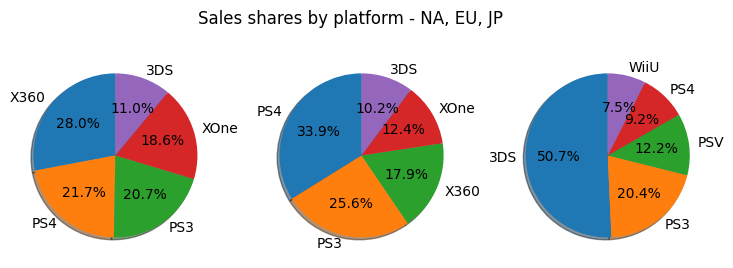

In [167]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].pie(na_platform_sales_share, labels=na_platform_sales_share.keys(), autopct='%1.1f%%', shadow=True, startangle=90)
axs[1].pie(eu_platform_sales_share, labels=eu_platform_sales_share.keys(), autopct='%1.1f%%', shadow=True, startangle=90)
axs[2].pie(jp_platform_sales_share, labels=jp_platform_sales_share.keys(), autopct='%1.1f%%', shadow=True, startangle=90)
fig.suptitle('Sales shares by platform - NA, EU, JP')

In [168]:
display("The most popular platforms in the NA region:")
display(na_platform_sales)
display("Sales shares of each platform in the NA region:")
display(na_platform_sales_share)

display("The most popular platforms in the EU region:")
display(eu_platform_sales)
display("Sales shares of each platform in the EU region:")
display(eu_platform_sales_share)

display("The most popular platforms in the JP region:")
display(jp_platform_sales)
display("Sales shares of each platform in the JP region:")
display(jp_platform_sales_share)

'The most popular platforms in the NA region:'

platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

'Sales shares of each platform in the NA region:'

platform
X360    0.236983
PS4     0.184003
PS3     0.174933
XOne    0.157571
3DS     0.093592
Name: na_sales, dtype: float64

'The most popular platforms in the EU region:'

platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

'Sales shares of each platform in the EU region:'

platform
PS4     0.278383
PS3     0.210844
X360    0.147034
XOne    0.101792
3DS     0.084132
Name: eu_sales, dtype: float64

'The most popular platforms in the JP region:'

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64

'Sales shares of each platform in the JP region:'

platform
3DS     0.455862
PS3     0.183249
PSV     0.109253
PS4     0.082875
WiiU    0.067556
Name: jp_sales, dtype: float64

We will group the data by regions and calculate the total sales for each genre. Then, we will select the top 5 genres with the highest total sales for each region.

In [169]:
na_platform_genre = df_2016.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_platform_genre = df_2016.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_platform_genre = df_2016.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

In [170]:
na_platform_genre_share = na_platform_genre / df_2016['na_sales'].sum()
eu_platform_genre_share = eu_platform_genre / df_2016['eu_sales'].sum()
jp_platform_genre_share = jp_platform_genre / df_2016['jp_sales'].sum()

Text(0.5, 0.98, 'Sales Shares by Genre - NA, EU, JP')

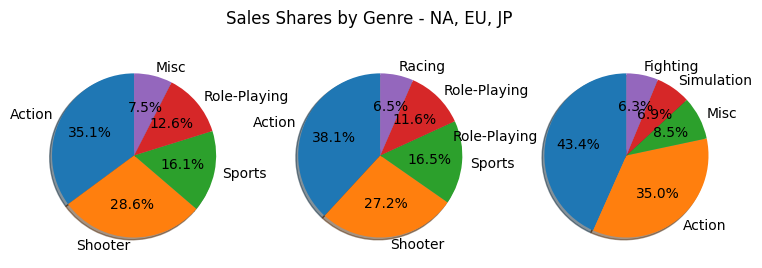

In [171]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].pie(na_platform_genre_share, labels=na_platform_genre_share.keys(), autopct='%1.1f%%', shadow=True, startangle=90)
axs[1].pie(eu_platform_genre_share, labels=eu_platform_genre_share.keys(), autopct='%1.1f%%', shadow=True, startangle=90)
axs[2].pie(jp_platform_genre_share, labels=jp_platform_genre_share.keys(), autopct='%1.1f%%', shadow=True, startangle=90)
fig.suptitle('Sales Shares by Genre - NA, EU, JP')

In [172]:
display("The most popular genres in the NA region:")
display(na_platform_genre)
display("Sales shares of each genre in the NA region:")
display(na_platform_genre_share)

display("The most popular genres in the EU region:")
display(eu_platform_genre)
display("Sales shares of each genre in the EU region:")
display(eu_platform_genre_share)

display("The most popular genres in the JP region:")
display(jp_platform_genre)
display("Sales shares of each genre in the JP region:")
display(jp_platform_genre_share)

'The most popular genres in the NA region:'

genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64

'Sales shares of each genre in the NA region:'

genre
Action          0.300929
Shooter         0.244970
Sports          0.137960
Role-Playing    0.108297
Misc            0.064623
Name: na_sales, dtype: float64

'The most popular genres in the EU region:'

genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64

'Sales shares of each genre in the EU region:'

genre
Action          0.314392
Shooter         0.223886
Sports          0.136321
Role-Playing    0.095754
Racing          0.053846
Name: eu_sales, dtype: float64

'The most popular genres in the JP region:'

genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64

'Sales shares of each genre in the JP region:'

genre
Role-Playing    0.339807
Action          0.274172
Misc            0.066777
Simulation      0.054055
Fighting        0.049019
Name: jp_sales, dtype: float64

Let's examine whether the ESRB rating affects sales in a specific region. We will group the data by regions and ESRB ratings, then calculate the total sales.

In [173]:
sales_rating_na = df_2016.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5)
sales_rating_eu = df_2016.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5)
sales_rating_jp = df_2016.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5)
sales_rating_other = df_2016.groupby('rating')['other_sales'].sum().sort_values(ascending=False).head(5)

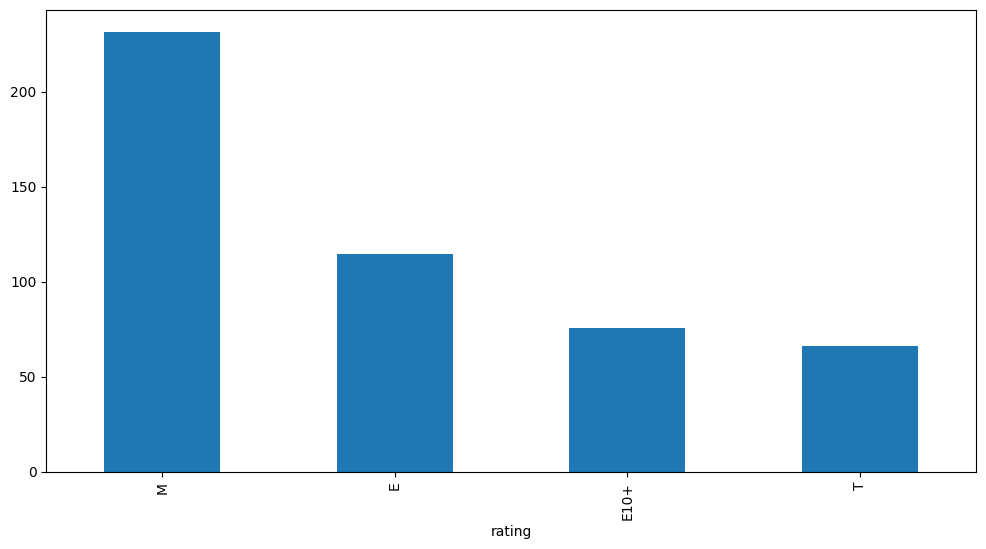

In [174]:
sales_rating_na.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.show()

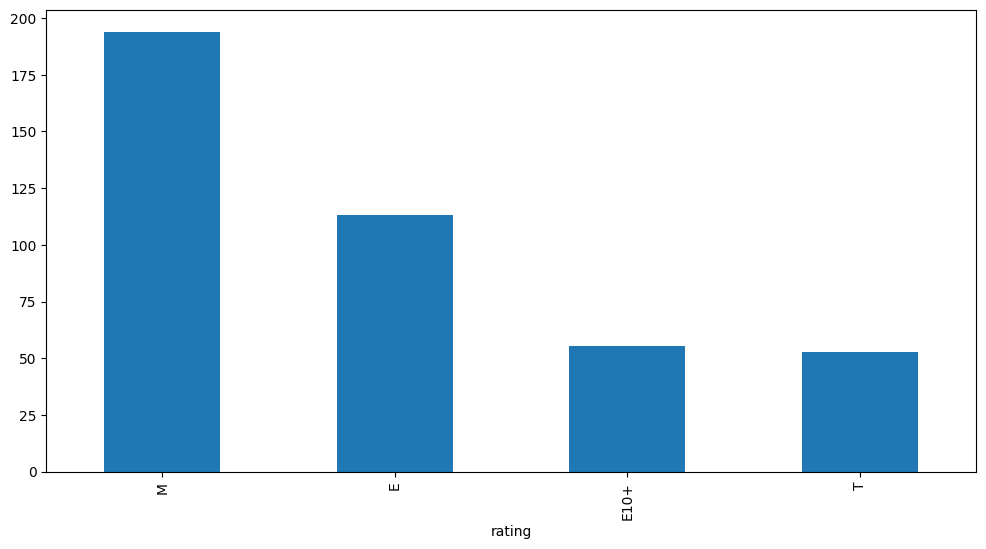

In [175]:
sales_rating_eu.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.show()

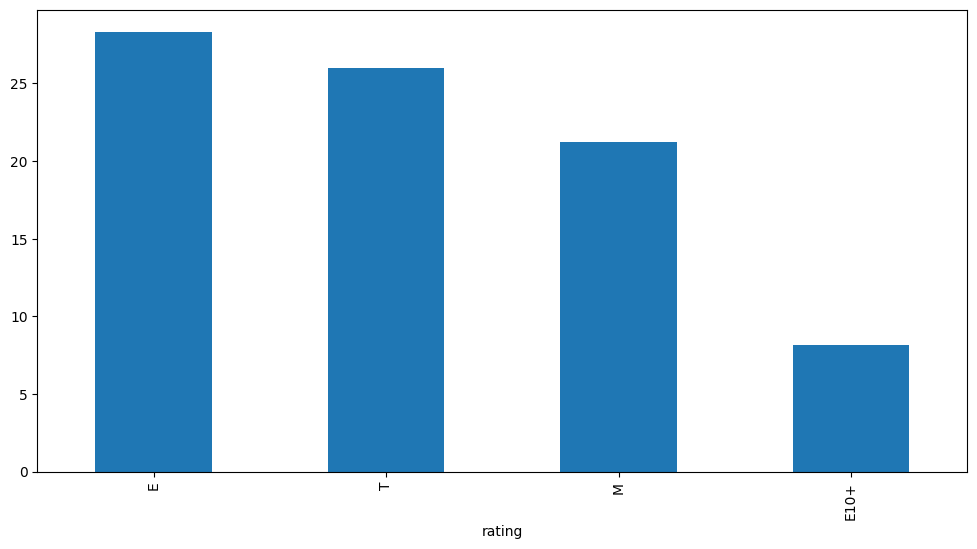

In [176]:
sales_rating_jp.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.show()

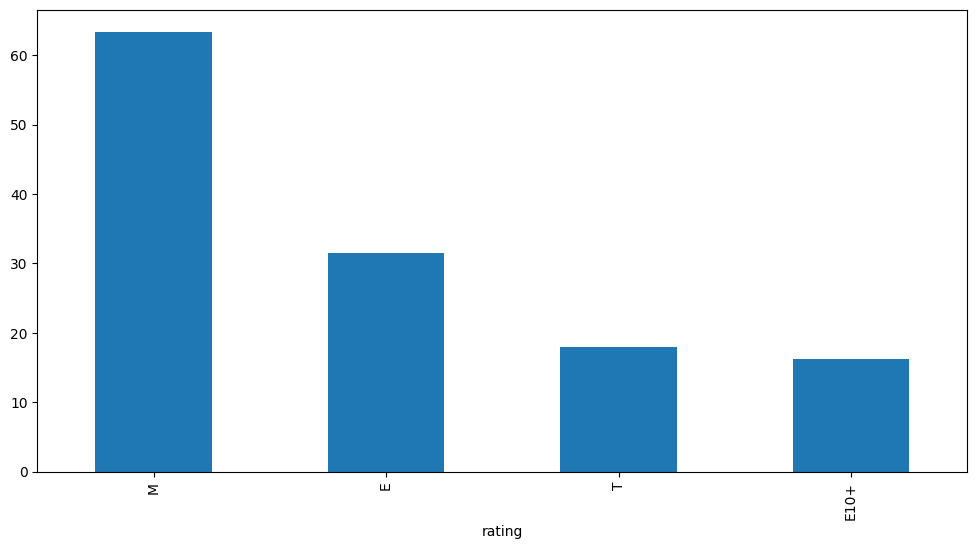

In [177]:
sales_rating_other.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.show()

Based on the analysis above, the profile of a typical user can be described as follows:

NA

- Main platform: X360
- Main genre: Action
- Main rating: M

EU
- Main platform: PS4
- Main genre: Action
- Main rating: M

JP
- Main platform: 3DS
- Main genre: Role-Playing
- Main ratings: E and T

#### Hypothesis Testing

In this chapter, we will test the following hypotheses:

- The average user ratings for the platforms Xbox One and PC are the same.
- The average user ratings for the genres Action and Sports are different.

To test these hypotheses, we can use a t-test for independent samples. We choose the t-test because it allows us to compare the means of two groups and determine whether there is a statistically significant difference between them. In this case, we have two independent samples (user ratings for platforms and genres), and we want to determine whether the means of these samples differ. The t-test is appropriate for this type of comparison. We will use the commonly accepted alpha threshold of 0.05.

Let's formulate the null and alternative hypotheses for the first statement:

- Null Hypothesis (H₀): The average user ratings for the Xbox One and PC platforms are equal.
- Alternative Hypothesis (H₁): The average user ratings for the Xbox One and PC platforms are different.

In [178]:
XOne_data = df_2016[(df_2016['platform'] == 'XOne')&(df_2016['user_score'] != 0)]

In [179]:
PC_data = df_2016[(df_2016['platform'] == 'PC')&(df_2016['user_score'] != 0)]

In [180]:
alpha = 0.05

In [181]:
results = st.ttest_ind(XOne_data['user_score'], PC_data['user_score'])  # performing t-test for two samples, using a one-sided hypothesis "greater"
display(f'p-value: {results.pvalue}')
# checking p-value
if results.pvalue < alpha:
    display('Reject the null hypothesis')
else:
    display('No grounds to reject the null hypothesis')

'p-value: 0.5535080500643661'

'No grounds to reject the null hypothesis'

The p-value is sufficiently high, which tells us that we cannot reject the null hypothesis, meaning that the average user ratings for the Xbox One and PC platforms are equal.

Let's formulate the null and alternative hypotheses for the second statement:

- Null Hypothesis (H₀): The average user ratings for the Action and Sports genres are equal.
- Alternative Hypothesis (H₁): The average user ratings for the Action and Sports genres are different.

In [182]:
Action_data = df_2016[(df_2016['genre'] == 'Action')&(df_2016['user_score'] != 0)]

In [183]:
Sports_data = df_2016[(df_2016['genre'] == 'Sports')&(df_2016['user_score'] != 0)]

In [184]:
alpha = 0.05

In [185]:
results = st.ttest_ind(Action_data['user_score'], Sports_data['user_score'])  # performing t-test for two samples, using a one-sided hypothesis "greater"
display(f'p-value: {results.pvalue}')
# checking p-value
if results.pvalue < alpha:
    display('Reject the null hypothesis')
else:
    display('No grounds to reject the null hypothesis')

'p-value: 3.716308946093486e-26'

'Reject the null hypothesis'

The p-value is lower than the significance level, which tells us that we can reject the null hypothesis, meaning we reject the hypothesis that the average user ratings for the Action and Sports genres are equal.

#### Сonclusion


In the course of the study, we:

- Loaded data on game sales.
- Conducted a thorough data check – changed data types and filled missing values.
- By constructing graphs, we gained an understanding of some quantitative and qualitative characteristics of the data, such as:
  - The number of games starts increasing from 1995 and continues to rise until 2009. The peak values are between 2005 and 2010.
  - The top 6 platforms by sales:
    - PS2 1255.77 – sales years from 2000 to 2010
    - X360 971.42 – sales years from 2005 to 2015
    - PS3 939.65 – sales years from 2006 to 2016
    - Wii 907.51 – sales years from 2003 to 2013
    - DS 806.12 – sales years from 2003 to 2013
    - PS 729.04 – sales years from 1994 to 2004
  - It can be said that the typical lifespan of platforms is about 10 years.
  - Potentially profitable platforms for 2017 include PS4, XOne, and 3DS.
  - For the PS4, XOne, and 3DS platforms, it can also be stated that with increasing sales, critics’ ratings moderately rise. In contrast, user ratings for PS4 and XOne show a slight decline as sales increase.
  - The most profitable genres for 2017 are: Shooter, Platform, Sports.
  - The least profitable genres are: Strategy, Puzzle, Adventure.
- We also created profiles of typical users for different regions:
    - NA
      - Main platform: X360
      - Main genre: Action
      - Main rating: M
  - EU
      - Main platform: PS4
      - Main genre: Action
      - Main rating: M
  - JP
      - Main platform: 3DS
      - Main genre: Role-Playing
      - Main ratings: E and T
- We considered and tested several hypotheses, leading to the following conclusions:
    - We cannot reject the hypothesis that the average user ratings for Xbox One and PC platforms are equal.
    - We can reject the hypothesis that the average user ratings for Action and Sports genres are equal.

Based on the analysis, the following conclusions can be made:

Our research showed that the number of games released began to rise in 1995 and continued to grow until 2009. The peak values were between 2005 and 2010. The most popular platform of all time is PS2. However, potentially profitable platforms for 2017 include PS4, XOne, and 3DS. The most profitable genres for 2017 are Shooter, Platform, and Sports. Sales numbers moderately correlate with high critic ratings. Regional preferences indicate that in North America, the main platform is X360 and the popular genre is Action, while in Europe, PS4 is leading with the same genre. In Japan, the dominant platform is 3DS and the popular genre is Role-Playing. For effective advertising campaign planning and product identification, these regional preferences should be considered, as well as the fact that the average user ratings for Xbox One and PC are equal, while the Action and Sports genres show significant differences.